In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [3]:
test_df = pd.read_csv(r"..\testing\data\test_data_for_graph_mockups.csv")

In [4]:
test_df.head()

,Fiscal Year,HDD,Electricity [kWh],Electricity [MMBTU],Electricity [kW],Electricity Total Cost [$],Electricity Usage Cost [$],Electricity Demand Cost [$],Electricity Energy Cost [$/MMBTU],Oil #1 [gal],...,Oil Cost,Savings over Nat Gas,Savings over Oil,Fuel Switching Savings,Water [gal],Water Cost [$],Sewer [gal],Sewer Cost [$],Total Water Cost [$],Total Unit Cost [$/gal]
0,2016,12017,1466818.911,5004.786125,275.727150,245104.1135,199539.1952,45564.91834,48.973944,46983.000000,...,90518.02727,51415.717810,5080.364063,66133.62662,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,12345,1273106.250,4343.838525,256.558973,227302.3628,187167.4719,40134.89094,52.327535,18317.387390,...,141787.10920,7772.335758,-4059.870058,16644.07814,1746261.290,18736.47258,1746261.290,19351.44097,38087.91355,0.021811
2,2014,12531,1366846.452,4663.680093,249.450437,251364.9614,211858.7255,39506.23589,53.898414,4533.093299,...,202307.39130,-1252.501431,22209.656020,39172.00761,1863525.161,19376.53981,1863525.161,19998.58271,39375.12252,0.021129
3,2013,14939,1395082.298,4760.020802,278.664146,275100.6083,236948.6051,38152.00318,57.793993,4509.852647,...,213022.42090,-724.893912,24403.632110,43406.14804,1849848.571,19739.86743,1849848.571,19848.89029,39588.75771,0.021401
4,2012,13960,1323357.702,4515.296478,265.806284,259947.4733,225250.8562,34696.61715,57.570411,6344.490196,...,212791.19390,-2031.409330,27043.282350,37475.32622,1869442.857,20926.58000,1869442.857,23038.01429,43964.59429,0.023517


In [5]:
list(test_df.columns.values)

['Fiscal Year',
 'HDD',
 'Electricity [kWh]',
 'Electricity [MMBTU]',
 'Electricity [kW]',
 'Electricity Total Cost [$]',
 'Electricity Usage Cost [$]',
 'Electricity Demand Cost [$]',
 'Electricity Energy Cost [$/MMBTU]',
 'Oil #1 [gal]',
 'Oil #1 [MMBTU]',
 'Oil #1 Cost [$]',
 'Oil Energy Cost [$/MMBTU]',
 'Natural Gas [ccf]',
 'Natural Gas [MMBTU]',
 'Natural Gas Cost [$]',
 'Natural Gas Energy Cost [$/MMBTU]',
 'District Heat [MMBTU',
 'District Heat Cost [$]',
 'District Heat Energy Cost [$/MMBTU]',
 'Total Heat Cost [$]',
 'Total Heat Energy [MMBTU]',
 'Specific Heat Cost [$/HDD]',
 'Specific Heat Energy [MMBTU/HDD]',
 'Natural Gas Cost',
 'Oil Cost',
 'Savings over Nat Gas',
 'Savings over Oil',
 'Fuel Switching Savings',
 'Water [gal]',
 'Water Cost [$]',
 'Sewer [gal]',
 'Sewer Cost [$]',
 'Total Water Cost [$]',
 'Total Unit Cost [$/gal]']

## Area Chart for Utility Cost Distribution

In [74]:
def area_cost_distribution(df, fiscal_year_col, utility_col_list, filename):
    # Inputs include the dataframe, the column name for the fiscal year column, and the list of column names for the 
    # different utility bills.  The dataframe should already include the summed bills for each fiscal year.
    
    # This can be changed later if we desire
    plt.style.use('bmh')

    fig, ax = plt.subplots(figsize=[15,10])

    
    # Take costs for each utility type and convert to percent of total cost by fiscal year
    df['total_costs'] = df[utility_col_list].sum(axis=1)

    percent_columns = []

    for col in utility_col_list:
        percent_col = "Percent " + col
        percent_columns.append(percent_col)
        df[percent_col] = df[col] / df.total_costs

    # Create stacked area plot
    ax.stackplot(df[fiscal_year_col], df[percent_columns].T, labels=percent_columns)

    # Increase the font of the axis tick labels
    ax.tick_params(axis='both', which='both', labelsize=16)

    # Format the y axis to be in percent
    ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
    
    # Format the x-axis to include all fiscal years
    plt.xticks(np.arange(df[fiscal_year_col].min(), df[fiscal_year_col].max()+1, 1.0))

    # Add title and axis labels
    plt.title('Annual Utility Cost Distribution',fontsize=20)
    plt.ylabel('Utility Cost Distribution', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=16)
    
    # Add legend
    plt.legend()
    
    
    plt.savefig(filename)
    plt.show()

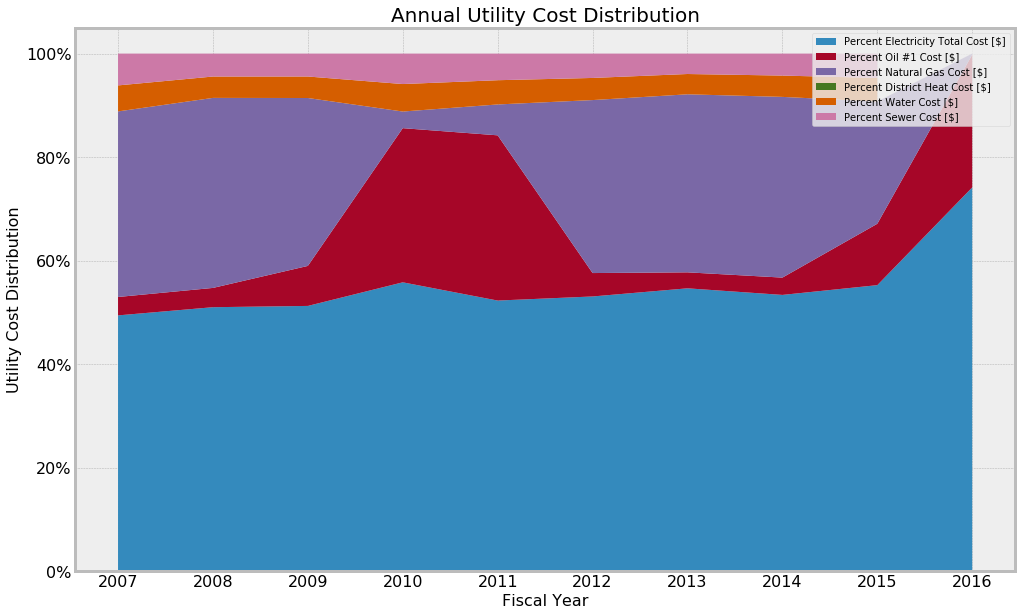

In [75]:
# Test the function
test_cols = ['Electricity Total Cost [$]', 'Oil #1 Cost [$]', 'Natural Gas Cost [$]','District Heat Cost [$]',
             'Water Cost [$]', 'Sewer Cost [$]']

area_cost_distribution(test_df, 'Fiscal Year', test_cols, "annual_utility_cost_distribution.png")

## Area Chart for Annual Energy Use Distribution Function

In [70]:
def area_use_distribution(df, fiscal_year_col, utility_col_list, filename):
    # Inputs include the dataframe, the column name for the fiscal year column, and the list of column names for the 
    # different utility bills.  The dataframe should already include the summed bills for each fiscal year.
    
    # This can be changed later if we desire
    plt.style.use('bmh')

    fig, ax = plt.subplots(figsize=[15,10])

    
    # Take usage for each utility type and convert to percent of total cost by fiscal year
    df['total_use'] = df[utility_col_list].sum(axis=1)

    percent_columns = []

    for col in utility_col_list:
        percent_col = "Percent " + col
        percent_columns.append(percent_col)
        df[percent_col] = df[col] / df.total_use

    # Create stacked area plot
    ax.stackplot(df[fiscal_year_col], df[percent_columns].T, labels=percent_columns)

    # Increase the font of the axis tick labels
    ax.tick_params(axis='both', which='both', labelsize=16)

    # Format the y axis to be in percent
    ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
    
    # Format the x-axis to include all fiscal years
    plt.xticks(np.arange(df[fiscal_year_col].min(), df[fiscal_year_col].max()+1, 1.0))

    # Add title and axis labels
    plt.title('Annual Energy Usage Distribution',fontsize=20)
    plt.ylabel('Annual Energy Usage Distribution', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=16)
    
    # Add legend 
    plt.legend()
    
    plt.savefig(filename)
    plt.show()

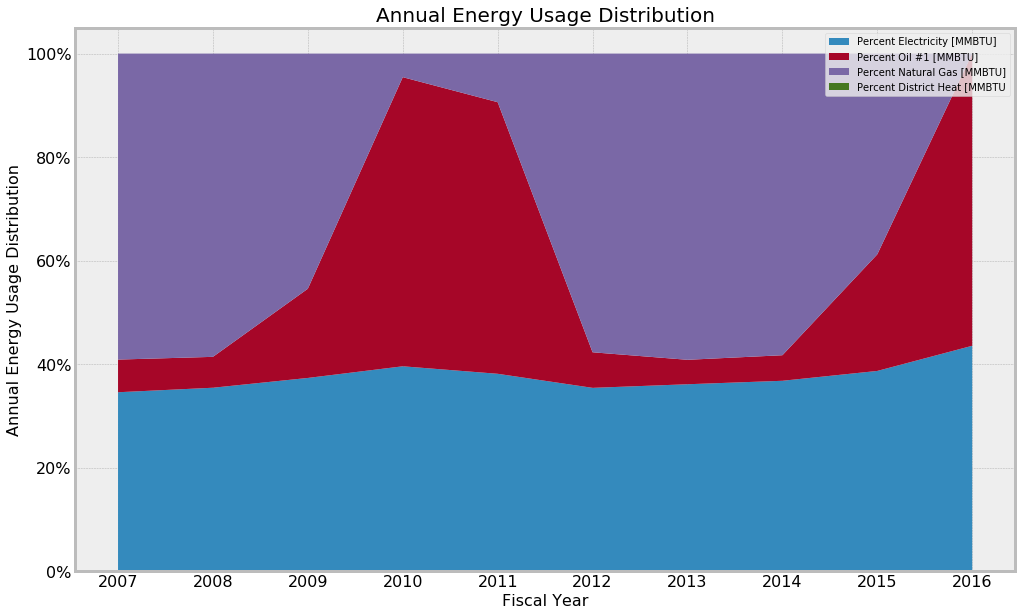

In [71]:
energy_use_cols =  ['Electricity [MMBTU]', 'Oil #1 [MMBTU]', 'Natural Gas [MMBTU]', 'District Heat [MMBTU']
area_use_distribution(test_df, 'Fiscal Year', energy_use_cols, 'annual_energy_use_distribution_chart3.png')

## Create a Stacked Bar Chart

### This still needs some work and needs to be converted to a function

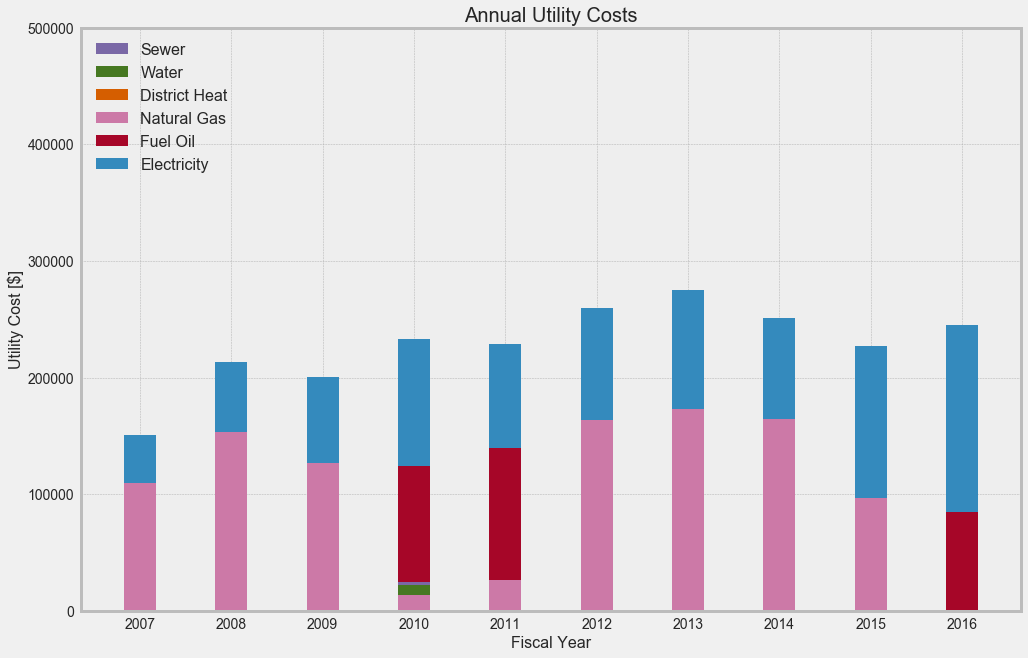

In [53]:
plt.style.use('bmh')

plt.figure(figsize=[15, 10])

# Set the bar width
width = 0.35

elec_bar = plt.bar(test_df['Fiscal Year'], test_df['Electricity Total Cost [$]'], width)
oil_bar = plt.bar(test_df['Fiscal Year'], test_df['Oil #1 Cost [$]'], width)
sewer_bar = plt.bar(test_df['Fiscal Year'], test_df['Sewer Cost [$]'], width)
water_bar = plt.bar(test_df['Fiscal Year'], test_df['Water Cost [$]'], width)
district_heat_bar = plt.bar(test_df['Fiscal Year'], test_df['District Heat Cost [$]'], width)
gas_bar = plt.bar(test_df['Fiscal Year'], test_df['Natural Gas Cost [$]'], width)

plt.ylabel('Utility Cost [$]', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=16)
plt.title('Annual Utility Costs', fontsize=20)

# Increase the font of the axis tick labels
plt.tick_params(axis='both', which='both', labelsize=14)

plt.xticks(test_df['Fiscal Year'].unique(), test_df['Fiscal Year'].unique())
plt.yticks(np.arange(0, 600000, 100000))

plt.legend((sewer_bar[0], water_bar[0], district_heat_bar[0], gas_bar[0], oil_bar[0], elec_bar[0]), 
           ('Sewer', 'Water', 'District Heat' , 'Natural Gas', 'Fuel Oil', 'Electricity'), fontsize=16)

plt.show()